# 蒙特卡洛模拟入门

## 抛硬币

In [67]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [68]:
def coin_flip():
    return random.randint(0, 1)

In [69]:
coin_flip()

1

In [70]:
list1 = []
def monte_carlo_coin(n=5000):
    results = 0.
    for i in range(n):
        flip_result = coin_flip()
        results = results + flip_result

        prob_value = results/(i+1)

        list1.append(prob_value)

    plt.axhline(y=0.5, color='red', linestyle='-')
    plt.xlabel('Iterations')
    plt.ylabel('Probability')
    #plt.xscale("log")
    plt.plot(list1)
    return results/n

Final vaule : 0.5134


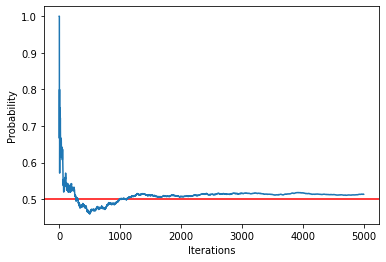

In [71]:
list1 = []
answer = monte_carlo_coin()
print("Final vaule :", answer)

## 计算$\pi$

In [72]:
def monte_carlo_pi(n=5,m=100):
    import random
    import numpy as np
    import matplotlib.pyplot as plt
    import turtle
    import math

    ## ----------------------------------------------------------------
    myPen = turtle.Turtle()
    myPen.hideturtle()
    myPen.speed(0)

    myPen.up()
    myPen.setposition(-100,-100)
    myPen.down()
    myPen.fd(200)
    myPen.left(90)
    myPen.fd(200)

    myPen.left(90)
    myPen.fd(200)
    myPen.left(90)
    myPen.fd(200)
    myPen.left(90)

    myPen.up()
    myPen.setposition(0,-100)
    myPen.down()
    myPen.circle(100)

    ## ----------------------------------------------------------------
    in_circle = 0
    out_circle =0

    pi_values =[]

    ## ----------------------------------------------------------------
    for i in range(n):
        for j in range(m):

            x = random.randrange(-100,100)
            y = random.randrange(-100,100)

            if (x**2+y**2>100**2):
                myPen.color("black")
                myPen.up()
                myPen.goto(x,y)
                myPen.down()
                myPen.dot()
                out_circle = out_circle + 1
            else:
                myPen.color("red")
                myPen.up()
                myPen.goto(x,y)
                myPen.down()
                myPen.dot()
                in_circle = in_circle + 1

            pi = 4.0 * in_circle / (in_circle + out_circle)

            pi_values.append(pi)

            avg_pi_errors = [abs(math.pi-pi) for pi in pi_values]

        print (pi_values[-1])

    ## ----------------------------------------------------------------
    # plot the PI values

    plt.axhline(y=math.pi,color='g',linestyle='-')
    plt.plot(pi_values)
    plt.xlabel("Iterations")
    plt.ylabel("Value of PI")
    plt.show()
    #Plot the error in calculation
    plt.axhline(y=0.0,color='g',linestyle='-')
    plt.plot(avg_pi_errors)
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.show()

In [73]:
# monte_carlo_pi()

## 三门问题

Winning probability if you always switch: 0.683
Winning probability if you always stick to your original choice: 0.317


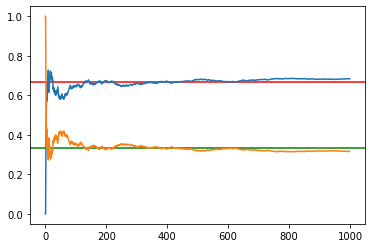

In [74]:
import random
import matplotlib.pyplot as plt

#we are going with 3 doors
#1-Car
#2 Goats
doors = ["goat","goat","car"]
#Empty Lists to store probability values
switch_win_probability = []
stick_win_probability = []

plt.axhline(y=2./3,color='r',linestyle='-')
plt.axhline(y=1./3,color='g',linestyle='-')

def monte_carlo_doors(n=1000):
    switch_wins = 0
    stick_wins = 0

    for i in range(n):

        random.shuffle(doors)

        k = random.randrange(2)

        if doors[k] != 'car':
            switch_wins += 1
        else:
            stick_wins += 1
        
        switch_win_probability.append(switch_wins/(i+1))
        stick_win_probability.append(stick_wins/(i+1))

    plt.plot(switch_win_probability)
    plt.plot(stick_win_probability)

    print('Winning probability if you always switch:' ,switch_win_probability[-1])
    print('Winning probability if you always stick to your original choice:',stick_win_probability[-1])

monte_carlo_doors()

# Ising 模型 
## 1

In [75]:
import random
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
import time

In [76]:
def main():
    size = 30 # 体系大小
    T = 2 # 温度
    ising = get_one_samples(sizeOfSample=size,temperature=T)
    plot(ising)
    energy_s = []
    for i in range(size):
        for j in range(size):
            energy_s = np.append(energy_s,[getEnergy(i,j,ising)],axis=0)
    plt.hist(energy_s,bins=50,density=1,facecolor='red',alpha=0.7)
    plt.show()

def get_one_samples(sizeOfSample, temperature):
    S = np.pi * np.random.randint(0,2,size = (sizeOfSample, sizeOfSample)) # 随机初始状态，角度是0或pi
    print("体系大小:", S.shape)
    initialEnergy = calculateAllEnergy(S) #计算随机初始状态的能量
    print("系统的初始能量是:", initialEnergy)
    newS = np.array(copy.deepcopy(S))
    for i00 in range(1000):
        newS = monte_carlo_ising2(newS,temperature)
        newEnergy = calculateAllEnergy(newS) 
        if np.mod(i00+1,100) == 0:
            print("循环次数%i,当前系统能量是:"%(i00+1),newEnergy)
    return newS

def calculateAllEnergy(S):

    energy = 0
    for i in range(S.shape[0]):
        for j in range(S.shape[1]):
            energy += getEnergy(i,j,S)
    return energy/2 #作用两次要减半

def getEnergy(i,j,S,angle = None):
    width = S.shape[0]
    height = S.shape[1]
    top_i = i - 1 if i > 0 else width - 1 #周期性边界条件
    bottom_i = i + 1 if i < (width - 1) else 0
    left_j = j - 1 if j > 0 else height - 1 
    right_j = j + 1 if j < (height - 1) else 0
    environment = [[top_i,j],[bottom_i,j],[i,left_j],[i,right_j]]
    energy = 0
    if angle == None:
        for num_i in environment:
            energy += -np.cos(S[i,j]-S[num_i[0],num_i[1]])
    else:
        for num_i in environment:
            energy += -np.cos(angle-S[num_i[0],num_i[1]])
    return energy

def monte_carlo_ising2(S,T):
    delta_max = np.pi #角度最大的变化度，默认为90度
    k = 1 #玻尔兹曼常数
    for i in range(S.shape[0]):
        for j in range(S.shape[1]):
            delta = np.random.randint(0,2) * delta_max # 角度变化0度或180度
            newAngle = S[i,j] + delta #新角度
            energyBefore = getEnergy(i,j,S) #获取该格点的能量
            energyLater = getEnergy(i,j,S,angle=newAngle) #获取该格点改变角度后的能量
            alpha = min(1.,np.exp(-(energyLater-energyBefore)/(k*T))) #玻尔兹曼分布
            if random.uniform(0,1) <= alpha:
                S[i,j] = newAngle #接受新状态
            else:
                pass
    return S

def plot(S): #画图
    X, Y = np.meshgrid(np.arange(0,S.shape[0]),np.arange(S.shape[1]))
    U = np.cos(S)
    V = np.sin(S)
    plt.figure(figsize=[8,8])
    plt.quiver(X,Y,U,V,units = "inches")
    plt.show()

if __name__ == "__main__":
    pass
    #main()


## 2

In [77]:
import random
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
import time
from matplotlib import animation

In [78]:
def neighor_spin_sum(s, x, y):
    """近接スピンの和を計算

    Parameters
    --------------------
    s : スピン配位
    x : 格子点のx座標
    y : 格子点のy座標

    Returns
    --------------------
    neighor_spin_sum : 近接スピンの和
    """
    x_right=x+1
    x_left=x-1
    y_up=y+1
    y_down=y-1

    # 周期境界条件
    if x_right>=Nx:
        x_right-=Nx
    if x_left<0:
        x_left+=Nx
    if y_up>=Ny:
        y_up-=Ny
    if y_down<0:
        y_down+=Ny

    neighor_spin_sum=s[x_right][y]+s[x_left][y]+s[x][y_up]+s[x][y_down]
    return neighor_spin_sum

In [79]:
def calc_energy(s, h=0.01):
    """エネルギーを計算

    Parameters
    --------------------
    s : スピン配位
    h : 外部磁場(バイアス)

    Returns
    --------------------
    energy : エネルギー
    """
    energy = 0
    for x in range(Nx):
        for y in range(Ny):
            # dobule count
            energy += - s[x][y] * neighor_spin_sum(s, x, y)/2
    energy += h*np.sum(s)
    return energy

In [80]:
def metropolis(s, beta=1, h=0.001):
    """メトロポリス法

    Parameters
    --------------------
    s : スピン配位
    beta : 逆温度パラメータ
    h : 外部磁場(バイアス)

    Returns
    --------------------
    s : 更新後のスピン配位
    """
    xs=list(range(Nx))
    random.shuffle(xs)
    ys=list(range(Ny))
    random.shuffle(ys)
    for x in xs:
        for y in ys:
            k=neighor_spin_sum(s, x, y)+h
            trans_prob = np.exp(-2*beta*s[x][y]*k)
            if np.random.random()<=trans_prob:
                s[x][y] = -s[x][y]
    return s   

In [81]:
def gibbs_sampling(s, beta=1.0, h=0.001):
    """ギブスサンプリング

    Parameters
    --------------------
    s : スピン配位
    beta : 逆温度パラメータ
    h : 外部磁場(バイアス)

    Returns
    --------------------
    s : 更新後のスピン配位
    """
    xs=list(range(Nx))
    random.shuffle(xs)
    ys=list(range(Ny))
    random.shuffle(ys)
    for x in xs:
        for y in ys:
            k=neighor_spin_sum(s, x, y)-h
            trans_prob = np.exp(beta*k) / (np.exp(beta*k)+np.exp(-beta*k))
            if np.random.random()<=trans_prob:
                s[x][y]=1
            else:
                s[x][y]=-1
    return s

In [95]:
def mcmc(s, steps=1000, beta=1.0, h=0.001, method='gibbs', interval=10, burn_in=10**2, animation=True, ani_interval=10):
    """マルコフ連鎖モンテカルロ法を実行
    
    Parameters
    -------------------
    s : 初期スピン配位
    steps : モンテカルロステップ
    beta : 逆温度パラメータ
    h : 外部磁場(バイアス)
    method : モンテカルロ法の手法, メトロポリス法 : metropolis, ギブスサンプリング : gibbs
    interval : サンプルを取得するインターバル
    burn_in : バーンインタイム

    Returns
    -------------------
    ms : 各ステップの磁化のリスト
    energies : 各ステップのエネルギーのリスト
    square_energies : 各ステップのエネルギーの二乗のリスト
    """
    ms=[]
    energies=[]
    square_energies=[]
    # Metropolis 
    if method=='metropolis':
        for step in range(steps):
            s = metropolis(s, beta=beta, h=h)
            # 自己相関が切れる部分かつburn inを捨てる
            if (step%interval==0)&(step>=burn_in):
                # 磁化を計算
                m = np.sum(s) / (Nx*Ny)
                # エネルギーを計算
                energy = calc_energy(s, h=h)
                # エネルギーの二乗を計算
                square_energy = energy**2 
                ms.append(m)
                energies.append(energy)
                square_energies.append(square_energy)

    # Gibbs
    elif method=='gibbs':
        for step in range(steps):
            s = gibbs_sampling(s, beta=beta, h=h)
            if (step%interval==0)&(step>=burn_in):
                # 磁化を計算
                m = np.sum(s) / (Nx*Ny)
                # エネルギーを計算
                energy = calc_energy(s, h=h) 
                # エネルギーの二乗を計算
                square_energy = energy**2
                ms.append(m)
                energies.append(energy)
                square_energies.append(square_energy)
    return ms, energies, square_energies

In [83]:
# 格子の大きさ
Nx = 32
Ny = 32
steps=10**4
# 初期配位
s = np.ones((Nx, Ny)).tolist()
ms, energies, square_energies=mcmc(s, steps=steps, beta=0.1, h=0.0)

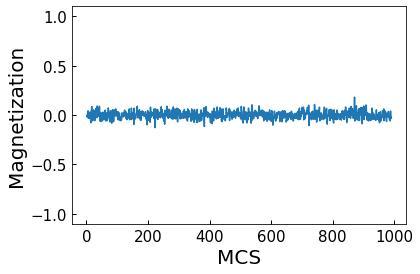

In [84]:
# 磁化
time = np.arange(1, len(ms)+1)
fig, ax=plt.subplots()
ax.plot(time, ms)
ax.set_ylim([-1.1, 1.1])
ax.set_xlabel('MCS', fontsize=20)
ax.set_ylabel('Magnetization', fontsize=20)
plt.tick_params(axis='y', width=1, length=4, pad=5, color='k', direction='in', labelsize=15, labelcolor='k')
plt.tick_params(axis='x', width=1, length=4, pad=5, color='k', direction='in', labelsize=15, labelcolor='k')
plt.show()

In [85]:
def mcmc_beta(s, betas, total_steps=10**5, burn_in=10**2, interval=20, h=0.01):
    """各温度毎にMCMCを実行

    Parameters
    --------------------
    s : 初期配位
    betas : MCMCを走らせる温度のリスト
    total_steps : モンテカルロステップ
    burn_in : バーンインタイム
    interval : サンプルを取得するインターバル
    h : 外部磁場

    Returns
    -------------------
    mags : 各温度の磁化
    mags_err : 各温度の各磁化の標準誤差
    energies : 各温度のエネルギー
    energies_err : 各温度の各エネルギーの標準誤差
    capacities : 各温度の比熱
    """
    b_mags=[]
    b_mags_err=[]
    b_energies=[]
    b_energies_err=[]
    b_capacities=[]
    for beta in betas:
        ms, energies, square_energies=mcmc(s, steps=total_steps, beta=beta, h=h, interval=interval, burn_in=burn_in)
        # 磁化
        b_mag=np.mean(ms)
        b_mag_err=np.std(ms)/np.sqrt(len(ms)-1)
        # エネルギー
        b_energy = np.mean(energies)
        b_energy_err = np.std(energies)/(np.sqrt(len(ms)-1))
        # 比熱
        b_square_energy = np.mean(square_energies)        
        b_capacity = (beta**2)*(b_square_energy - b_energy**2)

        b_mags.append(b_mag)
        b_mags_err.append(b_mag_err)
        b_energies.append(b_energy)
        b_energies_err.append(b_energy_err)
        b_capacities.append(b_capacity)
    return b_mags, b_mags_err, b_energies, b_energies_err, b_capacities

In [96]:
Nx = 64
Ny = 64
steps=10**4
# 初期状態
s = np.ones((Nx, Ny)).tolist()
interval=20
# サンプルする逆温度の値 
betas=np.linspace(0.05, 1.0, 20).tolist()
# mcmcを実行
b_mags, b_mags_err, b_energies, b_energies_err, b_capacities = mcmc_beta(s, betas, total_steps=10**3)

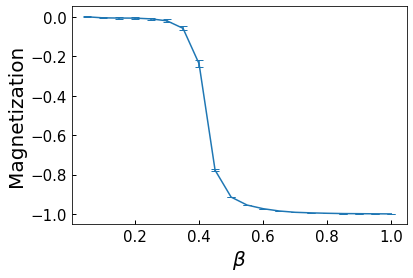

In [97]:
fig, ax=plt.subplots()
betas = np.array(betas)
b_mags = np.array(b_mags)
b_mags_err = np.array(b_mags_err)
ax.errorbar(betas, b_mags, yerr=b_mags_err, capsize=4)
ax.set_xlabel(r'$\beta$', fontsize=20)
ax.set_ylabel('Magnetization', fontsize=20)
plt.tick_params(axis='y', width=1, length=4, pad=5, color='k', direction='in', labelsize=15, labelcolor='k')
plt.tick_params(axis='x', width=1, length=4, pad=5, color='k', direction='in', labelsize=15, labelcolor='k')
plt.show()

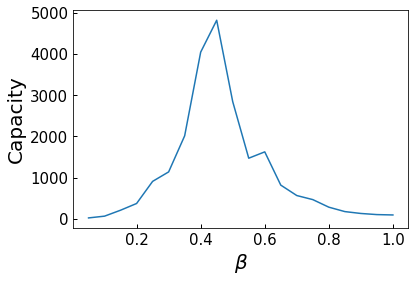

In [98]:
fig, ax = plt.subplots()
betas = np.array(betas)
b_capacities = np.array(b_capacities)
ax.plot(betas, b_capacities)
ax.set_xlabel(r'$\beta$', fontsize=20)
ax.set_ylabel('Capacity', fontsize=20)
plt.tick_params(axis='y', width=1, length=4, pad=5, color='k', direction='in', labelsize=15, labelcolor='k')
plt.tick_params(axis='x', width=1, length=4, pad=5, color='k', direction='in', labelsize=15, labelcolor='k')
plt.show()

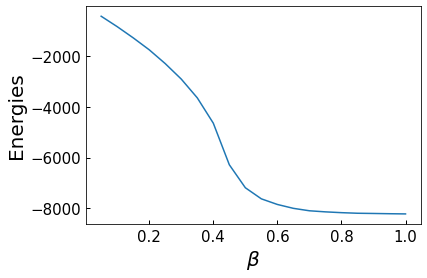

In [99]:
fig, ax = plt.subplots()
betas = np.array(betas)
b_energies = np.array(b_energies)
ax.plot(betas, b_energies)
ax.set_xlabel(r'$\beta$', fontsize=20)
ax.set_ylabel('Energies', fontsize=20)
plt.tick_params(axis='y', width=1, length=4, pad=5, color='k', direction='in', labelsize=15, labelcolor='k')
plt.tick_params(axis='x', width=1, length=4, pad=5, color='k', direction='in', labelsize=15, labelcolor='k')
plt.show()